In [1]:
import rhs
import gauss_legendre as gl
import numpy as np
import matplotlib.pyplot as plt


Integrating: 100%|██████████| 2500/2500 [1:21:44<00:00,  1.96s/step]


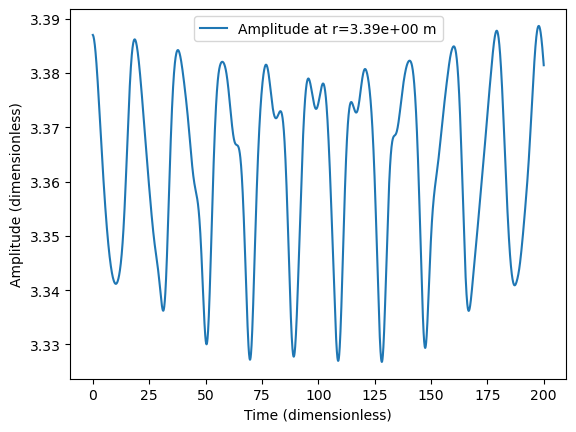

In [ ]:
def rhs_func(t, y, L = 1e-6, depth = 15e-9):
        N = 256
        local_x = y[:N]
        local_ampl = y[N:2*N]
        local_pot = y[2*N:3*N]
        res, vx, vy, dphi = rhs.calculate_rhs256_from_vectors(local_x, local_ampl, local_pot, L, 145, 0, depth)
        if res != 0:
            raise Exception("Error in calculation")
        return np.concatenate((vx, vy, dphi))
L = 1e-6
depth = 15e-9

def f(y):
    return rhs_func(0, y, L, depth)

def J(y):
    N = 256
    local_x = y[:N]
    local_ampl = y[N:2*N]
    local_pot = y[2*N:3*N]
    res, jacobian = rhs.calculate_jacobian(local_x, local_ampl, local_pot, L, 145, 0, depth)
    if jacobian is None or res != 0:
        raise Exception("Error in Jacobian calculation")
    return jacobian

N = 256
r = np.array([2.0*np.pi/N*x for x in range(N)])
initial_amplitude = 0.1*depth
L0 = L / (2.0 * np.pi)

ampl = np.cos(r) * initial_amplitude / L0
pot = initial_amplitude/L0 * np.sin(r)

y0 = np.concatenate((r, ampl, pot))

t0, t1, h = 0.0, 1*200.0, 0.08
T, Y = gl.integrate_gl2(f, J, y0, t0, t1, h, simplified=False, newton_maxit = 100)

r0 = r[N//2+10]
plt.figure()
plt.plot(T, Y[:, N+ N//2+10], label=f"Amplitude at r={r0:.2e} m")
plt.xlabel("Time (dimensionless)")
plt.ylabel("Amplitude (dimensionless)")
plt.legend()

In [16]:
print(f"TIme: {T[1250]}")

TIme: 100.0


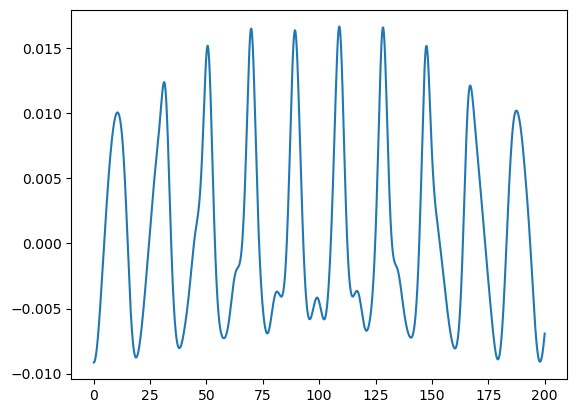

In [18]:
plt.plot(T, Y[:, N+ N//2+10], label=f"Amplitude at r={r0:.2e} m")

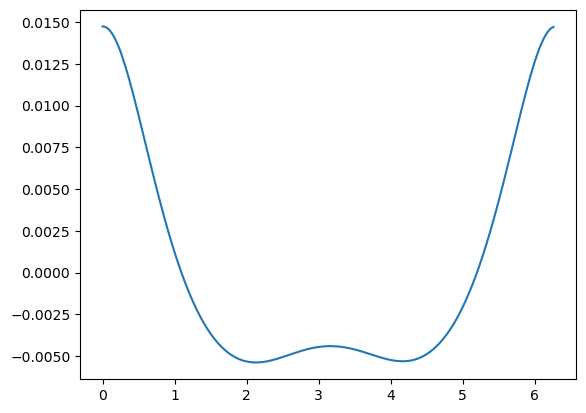

In [17]:
plt.plot(r, Y[1250, N:2*N], label="Initial amplitude")